<a href="https://colab.research.google.com/github/AurelienCD/Formation_OCR_Ing_Machine_Learning/blob/main/LibAUC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importation des librairies

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
%cd drive/MyDrive/Formation_OCR_Ing_Machine_Learning/Projet 7/Stage_Noémie/LibAUC

/content/drive/MyDrive/Formation_OCR_Ing_Machine_Learning/Projet 7/Stage_Noémie/LibAUC


In [3]:
pip install libauc

     |████████████████████████████████| 462 kB 33.2 MB/s 


In [4]:
import pandas as pad 
import numpy as np
from numpy.core.numeric import NaN

import datetime

import matplotlib.pyplot as plt
import seaborn as sns

import statistics
from scipy import stats
from scipy.stats import pearsonr
from scipy.stats import ttest_ind


import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp as multi 

import pandas as pad 
import numpy as np
from numpy.core.numeric import NaN

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics.cluster import adjusted_rand_score

from joblib import dump, load

from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, GridSearchCV

from sklearn.preprocessing import *
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

from sklearn.metrics import *
from sklearn.model_selection import KFold
from sklearn.metrics import  make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve

import tensorflow as tf
from tensorflow import keras
from keras.callbacks import ModelCheckpoint
import random
import numpy

import pandas.util.testing as tm

import joblib

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
from libauc.datasets import imbalance_generator

In [6]:
import torch
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
import numpy as np

# Préparation des données

## Importation des données

In [ ]:
!pip install libauc==1.1.8

### **Reproducibility**

In [ ]:
def set_all_seeds(SEED):
    # REPRODUCIBILITY
    torch.manual_seed(SEED)
    np.random.seed(SEED)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

### **Loading and Preprocessing Dataset**


In [ ]:
df = pad.read_excel('Database_LibAUC_0.xlsx')
df.dropna(axis = 0, how ='any')

,Feature_01,Feature_02,Feature_03,Feature_04,Feature_05,Feature_06,Class
0,0.4633,0.1076,40.4710,0.0859,0.1338,0.8025,0.0
1,0.4540,0.0997,36.4405,0.0815,0.1233,0.7998,0.0
2,0.4880,0.0803,61.0115,0.0558,0.1058,0.7631,0.0
3,0.4113,0.1118,34.3492,0.0926,0.1467,0.7588,0.0
4,0.6148,0.0940,31.4994,0.0792,0.1329,0.7026,0.0
...,...,...,...,...,...,...,...
1627,0.5041,0.1099,46.2522,0.0845,0.1460,0.7514,0.0
1628,0.4571,0.1253,41.3130,0.0995,0.1825,0.6850,0.0
1629,0.3610,0.1406,30.2030,0.1194,0.2063,0.6746,0.0
1630,0.5300,0.0692,64.1103,0.0470,0.0923,0.7494,0.0


In [ ]:
raw_df = df

In [ ]:
# Reference: https://www.tensorflow.org/tutorials/structured_data/imbalanced_data

neg, pos = np.bincount(raw_df['Class'])
total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(total, pos, 100 * pos / total))

cleaned_df = raw_df.copy()

# Use a utility from sklearn to split and shuffle your dataset.
train_df, test_df = train_test_split(cleaned_df, test_size=0.2)
train_df, val_df = train_test_split(train_df, test_size=0.2)

# Form np arrays of labels and features.
train_labels = np.array(train_df.pop('Class'))
bool_train_labels = train_labels != 0
val_labels = np.array(val_df.pop('Class'))
test_labels = np.array(test_df.pop('Class'))

train_features = np.array(train_df)
val_features = np.array(val_df)
test_features = np.array(test_df)

# Normalize the input features using the sklearn StandardScaler. This will set the mean to 0 and standard deviation to 1.
# Note: The StandardScaler is only fit using the train_features to be sure the model is not peeking at the validation or test sets.
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)

val_features = scaler.transform(val_features)
test_features = scaler.transform(test_features)

train_features = np.clip(train_features, -5, 5)
val_features = np.clip(val_features, -5, 5)
test_features = np.clip(test_features, -5, 5)


print('Training labels shape:', train_labels.shape)
print('Validation labels shape:', val_labels.shape)
print('Test labels shape:', test_labels.shape)

print('Training features shape:', train_features.shape)
print('Validation features shape:', val_features.shape)
print('Test features shape:', test_features.shape)


Examples:
    Total: 1632
    Positive: 141 (8.64% of total)

Training labels shape: (1044,)
Validation labels shape: (261,)
Test labels shape: (327,)
Training features shape: (1044, 6)
Validation features shape: (261, 6)
Test features shape: (327, 6)


### **Paramaters**

In [ ]:
# random seed
SEED = 123

# you can tune these parameters 
BATCH_SIZE = 8
lr = 0.3
gamma = 500
weight_decay = 1e-5
margin = 1.0

# compute imbalance ratio based training set 
imratio = train_labels.sum()/train_labels.shape[0]

### **Loading Dataset**

In [ ]:
class CreditFraudDataset(Dataset):
    def __init__(self, data, target):
        self.data = data.astype(np.float32) # numpy array
        self.targets = target.astype(np.float32) # numpy array

    def __getitem__(self, index):
        data = self.data[index]
        target = self.targets[index]
        return data, target

    def __len__(self):
        return self.data.shape[0]

trainDataset = CreditFraudDataset(train_features, train_labels)
valDataset = CreditFraudDataset(val_features, val_labels)
testDataset = CreditFraudDataset(test_features, test_labels)

trainloader = torch.utils.data.DataLoader(trainDataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=1, pin_memory=True)
valloader = torch.utils.data.DataLoader(valDataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=1,  pin_memory=False)
testloader = torch.utils.data.DataLoader(testDataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=1,  pin_memory=False)

### **Defining a multi-layer perceptron (Neural Network)**

In [ ]:
from torch import nn
import torch.nn.functional as F

# you can extend this model to multi-layer perceptron
class MLP(torch.nn.Module):
    def __init__(self, input_dim=6, nn_dim=200, num_classes=1):
        super().__init__()
        self.fc1 = torch.nn.Linear(input_dim, nn_dim) #  increase number of layers here
        self.dropout = nn.Dropout(0.5)
        self.fc2 = torch.nn.Linear(nn_dim, 400) #  increase number of layers here
        self.dropout = nn.Dropout(0.5)
        self.fc3 = torch.nn.Linear(400, 800) #  increase number of layers here
        self.dropout = nn.Dropout(0.5)
        self.fc4 = torch.nn.Linear(800, num_classes)
    def forward(self, x):
        x1 = self.dropout(F.relu(self.fc1(x)))
        x2 = self.dropout(F.relu(self.fc2(x1)))
        x3 = self.dropout(F.relu(self.fc3(x2)))        
        return torch.sigmoid(self.fc4(x3))

### **Creating models & AUC Optimizer**

In [ ]:
set_all_seeds(SEED)
model = MLP(input_dim=6, num_classes=1) # num_classs=1 since we output 1 or 0 here
model = model.cuda()

Loss = AUCMLoss(imratio=imratio)
optimizer = PESG(model, 
                 a=Loss.a, 
                 b=Loss.b, 
                 alpha=Loss.alpha,  
                 lr=lr, 
                 gamma=gamma, 
                 margin=margin, 
                 weight_decay=weight_decay)

### **Training**

In [ ]:
def evaluate(data, model):
     model.eval()
     pred = []
     true = [] 
     for j, data in enumerate(data):
         data, targets = data
         data = data.cuda()
         y_pred = model(data)
         pred.append(y_pred.cpu().detach().numpy())
         true.append(targets.numpy())
     true = np.concatenate(true)
     pred = np.concatenate(pred)
     val_auc =  roc_auc_score(true, pred) 
     return val_auc

In [ ]:
print ('Start Training')
print ('-'*30)
for epoch in range(100):
    
     if epoch == 50 or epoch==75:
         # decrease learning rate by 10x & update regularizer
         optimizer.update_regularizer(decay_factor=10)
   
     train_pred = []
     train_true = []
     model.train()    
     for data, targets in trainloader:
         data, targets  = data.cuda(), targets.cuda()
         y_pred = model(data)
         loss = Loss(y_pred, targets)
         optimizer.zero_grad()
         loss.backward()
         optimizer.step()
         train_pred.append(y_pred.cpu().detach().numpy())
         train_true.append(targets.cpu().detach().numpy())

     train_true = np.concatenate(train_true)
     train_pred = np.concatenate(train_pred)
     train_auc = roc_auc_score(train_true, train_pred) 

     val_auc = evaluate(valloader, model)
     test_auc = evaluate(testloader, model)

     # print results
     print("epoch: {}, train_loss: {:4f}, train_auc:{:4f}, val_auc:{:4f}, test_auc:{:4f},  lr:{:4f}".format(epoch, loss.item(), train_auc, val_auc, test_auc, optimizer.lr ))

Start Training
------------------------------
epoch: 0, train_loss: 0.112865, train_auc:0.646928, val_auc:0.809750, test_auc:0.633681,  lr:0.300000
epoch: 1, train_loss: 0.142306, train_auc:0.698746, val_auc:0.824628, test_auc:0.671535,  lr:0.300000
epoch: 2, train_loss: 0.161619, train_auc:0.714468, val_auc:0.830801, test_auc:0.687630,  lr:0.300000
epoch: 3, train_loss: -0.054882, train_auc:0.734552, val_auc:0.832700, test_auc:0.704918,  lr:0.300000
epoch: 4, train_loss: 0.134854, train_auc:0.751850, val_auc:0.826686, test_auc:0.705663,  lr:0.300000
epoch: 5, train_loss: 0.116377, train_auc:0.755617, val_auc:0.827477, test_auc:0.707004,  lr:0.300000
epoch: 6, train_loss: 0.141628, train_auc:0.763633, val_auc:0.832067, test_auc:0.715052,  lr:0.300000
epoch: 7, train_loss: 0.193329, train_auc:0.769730, val_auc:0.830643, test_auc:0.716095,  lr:0.300000
epoch: 8, train_loss: 0.114239, train_auc:0.737600, val_auc:0.832067, test_auc:0.710730,  lr:0.300000
epoch: 9, train_loss: 0.120153, tra

## Prediction

In [ ]:
X = df.drop('Class', axis=1)
X_norm = scaler.transform(X)
X_tensor = torch.from_numpy(X_norm)
X_tensor = X_tensor.cuda()
y = df['Class']

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [ ]:
outputs = model(X_tensor.float())

In [ ]:
proba = outputs.cpu()[:,:].detach().numpy()

In [ ]:
proba

array([[0.32251382],
       [0.46418366],
       [0.26707017],
       ...,
       [0.03778607],
       [0.38745627],
       [0.6901977 ]], dtype=float32)

In [ ]:
predictions = np.where(proba>0.20,0,1)

In [ ]:
predictions

array([[1],
       [0],
       [1],
       ...,
       [1],
       [1],
       [0]])

Best Threshold=0.519712, G-Mean=0.736


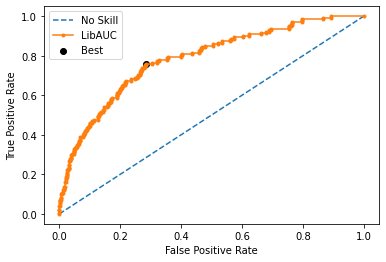

In [ ]:
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y, proba)
# calculate the g-mean for each threshold
gmeans = sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='LibAUC')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

In [ ]:
auc = roc_auc_score(y, proba)
print(auc)

In [ ]:
dump(model, "LibAUC.joblib")

['LibAUC.joblib']

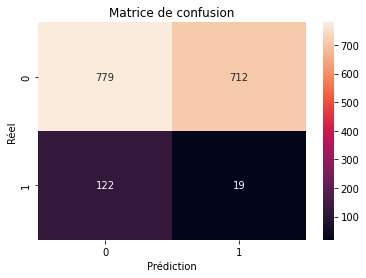

In [ ]:
conf_matrix = tf.math.confusion_matrix(labels=y, predictions=predictions)
 
ax_sgd_01 = sns.heatmap(conf_matrix, annot = True, fmt='d')
ax_sgd_01.set_title('Matrice de confusion')
ax_sgd_01.set_ylabel('Réel')
ax_sgd_01.set_xlabel('Prédiction')
plt.show()

In [ ]:
df['ClassPredict'] = predictions

In [ ]:
df['ClassPredict'].to_csv('prediction.csv', index = False)